In [1]:
import os
from glob import glob 
import matplotlib.pyplot as plt 
import geopandas as gpd 
import rioxarray as rxr 
import xarray as xr 
from shapely.geometry import mapping 
import numpy as np 
import numpy.ma as ma 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep

os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

In [1]:
!pip install rioxarray earthpy geopandas 

In [2]:
data = et.data.get_data('cold-springs-fire')

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

NameError: name 'et' is not defined

In [3]:
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping
import numpy as np
import numpy.ma as ma
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [4]:
data = et.data.get_data('cold-springs-fire')

os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [5]:
landsat_post_fire_path = os.path.join("cold-springs-fire","landsat_collect","LC080340322016072301T1-SC20180214145802","crop")

glob(os.path.join(landsat_post_fire_path, "*"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'co

In [6]:
glob(os.path.join(landsat_post_fire_path, "*.tif"))

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'co

In [7]:
fire_boundary_path = os.path.join("cold-springs-fire","vector_layers", "fire-boundary-geomac","co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

In [8]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[1-7]*.ti"))
all_landsat_post_bands.sort()
all_landsat_post_bands

[]

In [9]:
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[1-7]*.tif"))
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

In [10]:
landsat_crs = es.crs_check(all_landsat_post_bands[0])

fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [12]:
def open_clean_band(band_path, clip_extent, valid_range=None):
   
    try:
        clip_bound = clip_extent.geometry
    except Exception as err:
        print("Didn't work")
        print("Try again?")

    cleaned_band = rxr.open_rasterio(band_path,
                                     masked=True).rio.clip(clip_bound,
                                                           from_disk=True).squeeze()

    if valid_range:
        mask = ((landsat_post_xr_clip < valid_range[0]) | (
            landsat_post_xr_clip > valid_range[1]))
        cleaned_band = landsat_post_xr_clip.where(
            ~xr.where(mask, True, False))

    return cleaned_band

In [13]:
post_all_bands = []
for i, aband in enumerate(all_landsat_post_bands):
    cleaned = open_clean_band(aband, fire_boundary_utmz13)
    cleaned["band"] = i+1
    post_all_bands.append(cleaned)

In [14]:
post_fire_stack = xr.concat(post_all_bands, dim="band")
post_fire_stack

<xarray.DataArray (band: 7, y: 44, x: 113)> Size: 278kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x            (x) float64 904B 4.577e+05 4.577e+05 ... 4.61e+05 4.61e+05
  * y            (y) float64 352B 4.426e+06 4.426e+06 ... 4.425e+06 4.425e+06
  * band         (band) int64 56B 1 2 3 4 5 6 7
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

In [15]:
def process_bands(paths, crop_layer, stack=False):

    all_bands = []
    for i, aband in enumerate(paths):
        cleaned = open_clean_band(aband, crop_layer)
        cleaned["band"] = i+1
        all_bands.append(cleaned)

    if stack:
        print("Data stacked")
        return xr.concat(all_bands, dim="band")
    else:
        print("Xarray objects")
        return all_bands

In [16]:
fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path,
                                           "*band[1-7]*.tif"))
all_landsat_post_bands.sort()

landsat_crs = es.crs_check(all_landsat_post_bands[0])
fire_boundary_utmz13 = fire_boundary.to_crs(landsat_crs)

In [17]:
post_fire_stack = process_bands(all_landsat_post_bands, 
                                fire_boundary_utmz13, 
                                stack=True)
post_fire_stack.shape

Data stacked


(7, 44, 113)

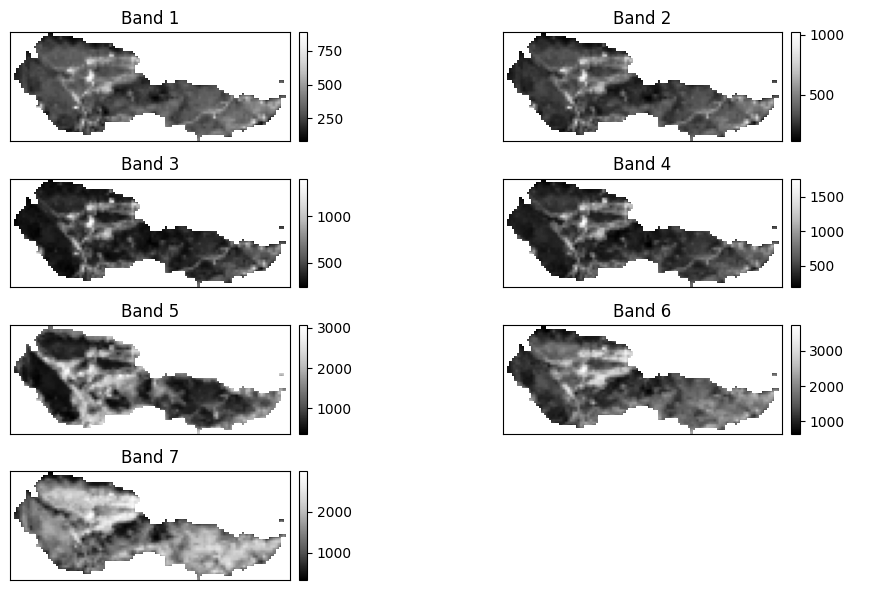

<Figure size 640x480 with 0 Axes>

In [18]:
band_titles = ["Blue Band","Green Band","Red Band","NIR Band"]

ep.plot_bands(post_fire_stack,
             cols=2,
             figsize=(10,6))
plt.suptitle("Cleaned And Cropped Landsat Bands")
plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


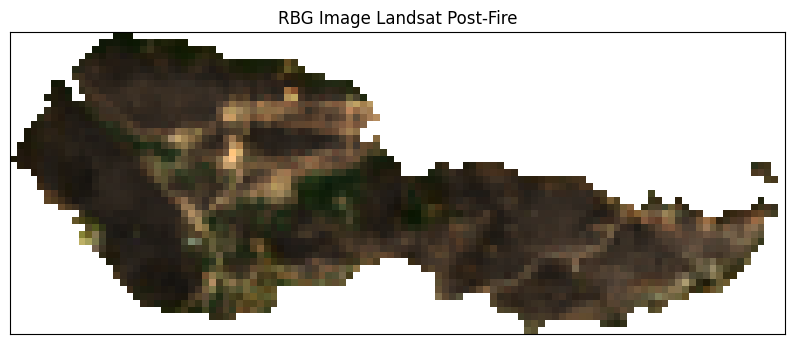

In [19]:
ep.plot_rgb(post_fire_stack,
            rgb=[3, 2, 1],
            title="RBG Image Landsat Post-Fire")

plt.show()

/home/codespace/.python/current/lib/python3.10/site-packages/earthpy/spatial.py:561: RuntimeWarning: invalid value encountered in cast
  return (bytedata.clip(low, high) + 0.5).astype("uint8")


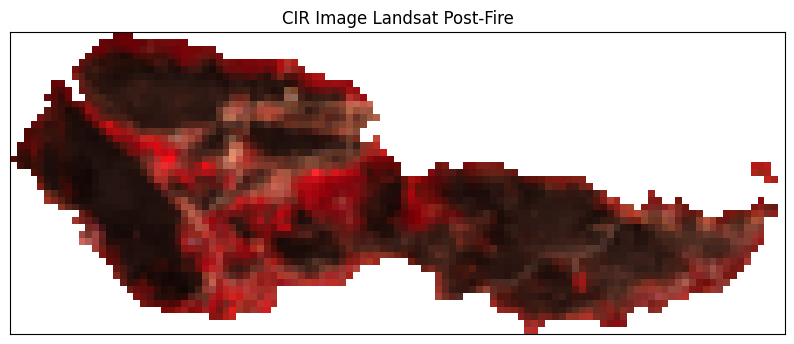

In [20]:
ep.plot_rgb(post_fire_stack,
            rgb=[4, 3, 2],
            title="CIR Image Landsat Post-Fire")

plt.show()